In [1]:
!pip install chardet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 3.8 MB/s eta 0:00:00


In [2]:
# let's find our encoding
# https://www.kaggle.com/code/rtatman/data-cleaning-challenge-character-encodings/notebook#Reading-in-files-with-encoding-problems
from glob import glob
from chardet import detect
files = sorted(list(glob(pathname='/kaggle/input/top-20-most-searched-queries-in-google-search/*.csv')))
first_file = files[0]
with open(first_file, 'rb') as rawdata:
    detection_result = detect(rawdata.read(10000))
encoding = detection_result['encoding']
print('encoding: {} file: {}'.format(encoding, first_file))

encoding: ISO-8859-1 file: /kaggle/input/top-20-most-searched-queries-in-google-search/202203.csv


In [3]:
import pandas as pd
# the unnamed column is redundant if we have the id column, and the time location is always UK
df = pd.concat(objs=[pd.read_csv(filepath_or_buffer=current, encoding=encoding, index_col=['id'], parse_dates=['created_date']) 
                    for current in files]).drop(columns=['Unnamed: 0', 'time_location'])
df.head()

,kw_location,created_date,period,1,2,3,4,5,6,7,...,13,14,15,16,17,18,19,20,year,month
id,,,,,,,,,,,,,,,,,,,,,
37,US,2022-03-11 00:08:03,Late Night,Grimes,MLB,Players Championship,Michigan Basketball,Jussie Smollett,Khalil Mack,Barcelona,...,Mario Day,Bruce Weber,Big East Tournament,Jen Psaki,Nick Cannon,Norwich City vs Chelsea,Samuel L. Jackson,Hayden Christensen,2022,3
38,UK,2022-03-11 00:08:03,Late Night,Premier League,Leeds United,Rangers,Southampton vs Newcastle,Grimes,Sam Ryder,Wolves vs Watford,...,F1,Rangers FC,Supreme,Russia Ukraine Putin News,Southmead Hospital,Ryan Coogler,Bryan Adams,Nile Rodgers,2022,3
40,DE,2022-03-11 00:08:03,Late Night,Chelsea,Galatasaray,Grimes,Heidi Klum,Kurt Krömer,Schröder Putin,Gauck,...,Katie Price,Joachim Gauck,EZB,Let\u2019s Dance,Real Madrid gegen PSG,Europa League,Eintracht Frankfurt,Tschernobyl,2022,3
41,FR,2022-03-11 00:08:03,Late Night,OM,Leicester \u2013 Rennes,Balthazar,Ne le dis à personne,L'equipe,Braga \u2013 Monaco,Corse,...,Marioupol,Lisa Azuelos,State of Play,Robert Menard,Coupe du monde 2022,Alain Maneval,Pauline Cheviller,SOFOOT,2022,3
42,NL,2022-03-11 00:08:03,Late Night,Chelsea,PSV,Vitesse,Barcelona,Grimes,Camila Cabello,Bodo Glimt,...,Boskalis,Real,Feyenoord,PSG,Tsjernobyl,Kevin Magnussen,Hans kazan,Willem 2,2022,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5628 entries, 37 to 8927
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   kw_location   5628 non-null   object        
 1   created_date  5628 non-null   datetime64[ns]
 2   period        5628 non-null   object        
 3   1             5628 non-null   object        
 4   2             5628 non-null   object        
 5   3             5628 non-null   object        
 6   4             5628 non-null   object        
 7   5             5628 non-null   object        
 8   6             5628 non-null   object        
 9   7             5628 non-null   object        
 10  8             5628 non-null   object        
 11  9             5628 non-null   object        
 12  10            5628 non-null   object        
 13  11            5628 non-null   object        
 14  12            5628 non-null   object        
 15  13            5628 non-null   object      

In [5]:
df.nunique()

kw_location        7
created_date     804
period             3
1               3612
2               4032
3               4207
4               4239
5               4266
6               4342
7               4314
8               4434
9               4428
10              4404
11              4351
12              4400
13              4305
14              4356
15              4423
16              4349
17              4316
18              4337
19              4334
20              4311
year               2
month             10
dtype: int64

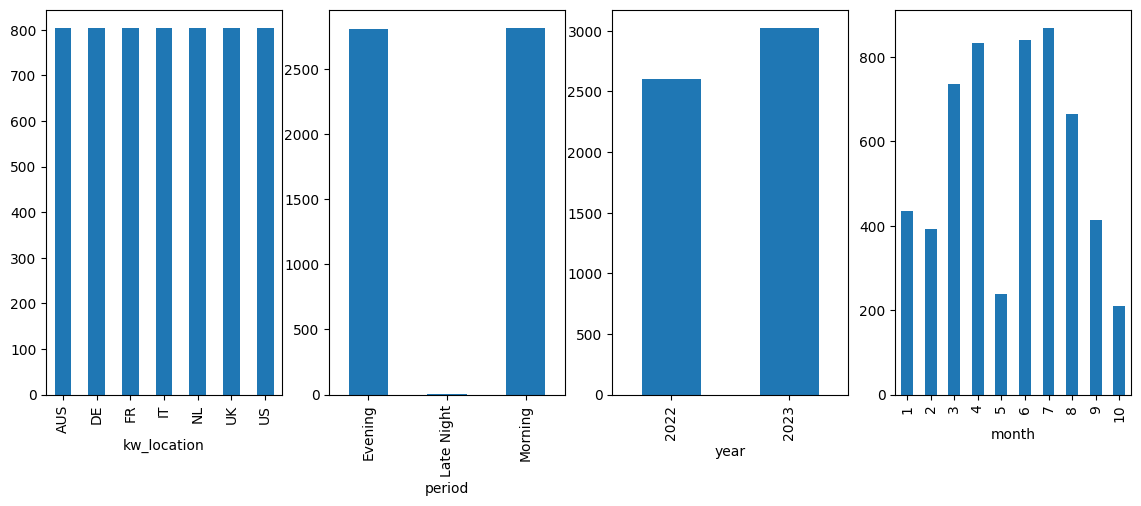

In [6]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(14, 5), ncols=4,)
for index, column in enumerate(['kw_location', 'period', 'year', 'month']):
    df[column].value_counts(sort=False).sort_index().plot(ax=ax.ravel()[index], kind='bar')